In [1]:
import pandas as pd
import os
import glob
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler

CAMBIO PATH PER PRENDERE IL FILE CSV PER LA CREAZIONE DEL DATAFRAME

In [2]:
path_file = os.path.abspath(os.getcwd()) #prendiamo il path in cui si trova il file su cui stiamo lavorando
print(path_file)
os.chdir(path_file) #cambiamo directory al fine di poter prendere i file csv per la creazione del dataframe
data = "/dataset"

/Users/davidceka/Documents/uni/advancedcyber/AdvancedCyberSecurity


In [3]:
final_path = path_file + data
print(final_path)

/Users/davidceka/Documents/uni/advancedcyber/AdvancedCyberSecurity/dataset


In [4]:
#file_14 = "\Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv"
#df_14 = pd.read_csv(final_path + file_14)

In [5]:
data_path = os.path.join(final_path,'*.csv') #lista di tutti gli elementi con estensione csv nella cartella final_path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
print(csv_list)

['/Users/davidceka/Documents/uni/advancedcyber/AdvancedCyberSecurity/dataset/Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv', '/Users/davidceka/Documents/uni/advancedcyber/AdvancedCyberSecurity/dataset/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv', '/Users/davidceka/Documents/uni/advancedcyber/AdvancedCyberSecurity/dataset/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv', '/Users/davidceka/Documents/uni/advancedcyber/AdvancedCyberSecurity/dataset/Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv', '/Users/davidceka/Documents/uni/advancedcyber/AdvancedCyberSecurity/dataset/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv', '/Users/davidceka/Documents/uni/advancedcyber/AdvancedCyberSecurity/dataset/Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv', '/Users/davidceka/Documents/uni/advancedcyber/AdvancedCyberSecurity/dataset/Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv', '/Users/davidceka/Documents/uni/advancedcyber/AdvancedCyberSecurity/dataset/Wednesday-14-02-2018_Traffi

In [6]:
grande = "/Thuesday-20-02-2018_TrafficForML_CICFlowMeter.csv"
for csv_file in csv_list:
    if csv_file == final_path + grande:
        csv_list.remove(csv_file)
    
print(csv_list)

['/Users/davidceka/Documents/uni/advancedcyber/AdvancedCyberSecurity/dataset/Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv', '/Users/davidceka/Documents/uni/advancedcyber/AdvancedCyberSecurity/dataset/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv', '/Users/davidceka/Documents/uni/advancedcyber/AdvancedCyberSecurity/dataset/Friday-02-03-2018_TrafficForML_CICFlowMeter.csv', '/Users/davidceka/Documents/uni/advancedcyber/AdvancedCyberSecurity/dataset/Thursday-22-02-2018_TrafficForML_CICFlowMeter.csv', '/Users/davidceka/Documents/uni/advancedcyber/AdvancedCyberSecurity/dataset/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv', '/Users/davidceka/Documents/uni/advancedcyber/AdvancedCyberSecurity/dataset/Wednesday-21-02-2018_TrafficForML_CICFlowMeter.csv', '/Users/davidceka/Documents/uni/advancedcyber/AdvancedCyberSecurity/dataset/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv', '/Users/davidceka/Documents/uni/advancedcyber/AdvancedCyberSecurity/dataset/Friday-16-02-2018_TrafficF

In [7]:
df_14 = pd.DataFrame() #creazione di un dataframe vuoto

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df_csv = pd.read_csv(csv_file) 
    df_14 = pd.concat([df_14,df_csv],ignore_index=True)

pd.set_option('display.max_columns', None)
display(df_14)

/var/folders/gj/tfccxpks40v6k4xmlkmr7j700000gn/T/ipykernel_31200/563674003.py:5: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df_csv = pd.read_csv(csv_file)
/var/folders/gj/tfccxpks40v6k4xmlkmr7j700000gn/T/ipykernel_31200/563674003.py:5: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df_csv = pd.read_csv(csv_file)
/var/folders/gj/tfccxpks40v6k4xmlkmr7j700000gn/T/ipykernel_31200/563674003.py:5: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,1

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,28/02/2018 08:22:13,94658,6,7,708,3718,387,0,118.0,159.284651,1460,0,531.142857,673.118224,46757.801771,137.336517,7888.166667,11130.042594,24325,0,72880,14576.0,12590.38397,24385,363,72178,12029.666667,13189.257518,24718,0,0,0,0,0,132,152,63.386085,73.950432,0,1460,316.142857,519.205881,269574.747253,0,0,1,1,0,0,0,1,1,340.461538,118.0,531.142857,0,0,0,0,0,0,6,708,7,3718,8192,7484,3,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,443,6,28/02/2018 08:22:13,206,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,9708.737864,206.0,0.0,206,206,206,206.0,0.0,206,206,0,0.0,0.0,0,0,0,0,0,0,40,0,9708.737864,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,258,-1,0,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,445,6,28/02/2018 08:22:15,165505,3,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,24.168454,55168.333333,95478.146491,165417,35,165505,82752.5,116980.210346,165470,35,0,0.0,0.0,0,0,0,0,0,0,72,32,18.126341,6.042114,0,0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,1,0,8192,8192,0,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,443,6,28/02/2018 08:22:16,102429,6,7,708,3718,387,0,118.0,159.284651,1460,0,531.142857,673.118224,43210.418924,126.917182,8535.75,10956.637724,24473,0,80271,16054.2,14269.754157,31379,366,79733,13288.833333,14753.482727,30931,0,0,0,0,0,132,152,58.577161,68.340021,0,1460,316.142857,519.205881,269574.747253,0,0,1,1,0,0,0,1,1,340.461538,118.0,531.142857,0,0,0,0,0,0,6,708,7,3718,8192,7484,3,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,443,6,28/02/2018 08:22:16,167,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,11976.047904,167.0,0.0,167,167,167,167.0,0.0,167,167,0,0.0,0.0,0,0,0,0,0,0,40,0,11976.047904,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,258,-1,0,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8284249,54116,6,23/02/2018 09:00:54,85992425,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.023258,85992425.0,0.0,85992425,85992425,85992425,85992425.0,0.0,85992425,85992425,0,0.0,0.0,0,0,0,0,0,0,40,0,0.023258,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,62569,-1,0,20,0.0,0.0,0,0,85992425.0,0.0,85992425,85992425,Benign
8284250,33914,6,23/02/2018 12:31:42,132,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,15151.515152,132.0,0.0,132,132,132,132.0,0.0,132,132,0,0.0,0.0,0,0,0,0,0,0,40,0,15151.515152,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,258,-1,0,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
8284251,53,17,23/02/2018 12:15:24,79134,1,1,41,98,41,41,41.0,0.0,98,98,98.0,0.0,1756.514267,25.273587,79134.0,0.0,79134,79134,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,8,8,12.636793,12.636793,41,98,60.0,32.908965,1083.0,0,0,0,0,0,0,0,0,1,90.0,41.0,98.0,0,0,0,0,

In [8]:
pd.set_option('display.max_columns', None)
display(df_14)

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,28/02/2018 08:22:13,94658,6,7,708,3718,387,0,118.0,159.284651,1460,0,531.142857,673.118224,46757.801771,137.336517,7888.166667,11130.042594,24325,0,72880,14576.0,12590.38397,24385,363,72178,12029.666667,13189.257518,24718,0,0,0,0,0,132,152,63.386085,73.950432,0,1460,316.142857,519.205881,269574.747253,0,0,1,1,0,0,0,1,1,340.461538,118.0,531.142857,0,0,0,0,0,0,6,708,7,3718,8192,7484,3,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,443,6,28/02/2018 08:22:13,206,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,9708.737864,206.0,0.0,206,206,206,206.0,0.0,206,206,0,0.0,0.0,0,0,0,0,0,0,40,0,9708.737864,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,258,-1,0,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,445,6,28/02/2018 08:22:15,165505,3,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,24.168454,55168.333333,95478.146491,165417,35,165505,82752.5,116980.210346,165470,35,0,0.0,0.0,0,0,0,0,0,0,72,32,18.126341,6.042114,0,0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,1,0,8192,8192,0,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,443,6,28/02/2018 08:22:16,102429,6,7,708,3718,387,0,118.0,159.284651,1460,0,531.142857,673.118224,43210.418924,126.917182,8535.75,10956.637724,24473,0,80271,16054.2,14269.754157,31379,366,79733,13288.833333,14753.482727,30931,0,0,0,0,0,132,152,58.577161,68.340021,0,1460,316.142857,519.205881,269574.747253,0,0,1,1,0,0,0,1,1,340.461538,118.0,531.142857,0,0,0,0,0,0,6,708,7,3718,8192,7484,3,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,443,6,28/02/2018 08:22:16,167,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,11976.047904,167.0,0.0,167,167,167,167.0,0.0,167,167,0,0.0,0.0,0,0,0,0,0,0,40,0,11976.047904,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,258,-1,0,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8284249,54116,6,23/02/2018 09:00:54,85992425,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.023258,85992425.0,0.0,85992425,85992425,85992425,85992425.0,0.0,85992425,85992425,0,0.0,0.0,0,0,0,0,0,0,40,0,0.023258,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,62569,-1,0,20,0.0,0.0,0,0,85992425.0,0.0,85992425,85992425,Benign
8284250,33914,6,23/02/2018 12:31:42,132,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,15151.515152,132.0,0.0,132,132,132,132.0,0.0,132,132,0,0.0,0.0,0,0,0,0,0,0,40,0,15151.515152,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,258,-1,0,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
8284251,53,17,23/02/2018 12:15:24,79134,1,1,41,98,41,41,41.0,0.0,98,98,98.0,0.0,1756.514267,25.273587,79134.0,0.0,79134,79134,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,8,8,12.636793,12.636793,41,98,60.0,32.908965,1083.0,0,0,0,0,0,0,0,0,1,90.0,41.0,98.0,0,0,0,0,

In [6]:
'''remove = ['Fwd Byts/b Avg','Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg','Fwd PSH Flags','FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'URG Flag Cnt', 'ECE Flag Cnt','Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'CWE Flag Count']

for a in remove:
    df_14.drop(columns=a,axis=1,inplace=True)'''

"remove = ['Fwd Byts/b Avg','Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg','Fwd PSH Flags','FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'URG Flag Cnt', 'ECE Flag Cnt','Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'CWE Flag Count']\n\nfor a in remove:\n    df_14.drop(columns=a,axis=1,inplace=True)"

In [9]:
first = ['Dst Port', 'Protocol', 'Timestamp']

for a in first:
    df_14.drop(columns=a,axis=1,inplace=True)

print(df_14.shape)

(8284254, 77)


GROUP BY RISPETTO ALLE TIPOLOGIE DELL'ATTACCO

In [21]:
df2 = df_14.groupby(['Label'])['Label'].count()
print(df2)

Label
0     6112151
1      286191
2         611
3         230
4      686012
5        1730
6       41508
7      461912
8      139890
9       10990
10     193360
11     161934
12         87
13     187589
Name: Label, dtype: int64


In [9]:
#abbiamo creato un secondo dataframe per plottare i grafici, in modo da rappresentare le diverse tipologie di attacco
df_14_2 = df_14

In [19]:
df_14 = df_14[df_14.Label != "Label"]
print(df_14)

        Flow Duration Tot Fwd Pkts Tot Bwd Pkts TotLen Fwd Pkts   
0               94658            6            7             708  \
1                 206            2            0               0   
2              165505            3            1               0   
3              102429            6            7             708   
4                 167            2            0               0   
...               ...          ...          ...             ...   
8284249      85992425            2            0               0   
8284250           132            2            0               0   
8284251         79134            1            1              41   
8284252      10053785           11           12            1321   
8284253        566835            6            5             455   

        TotLen Bwd Pkts Fwd Pkt Len Max Fwd Pkt Len Min Fwd Pkt Len Mean   
0                  3718             387               0            118.0  \
1                     0               0    

In [12]:
df_14 = df_14.replace("Benign", 0)
df_14 = df_14.replace("Bot", 1)
df_14 = df_14.replace("Brute Force -Web", 2)
df_14 = df_14.replace("Brute Force -XSS", 3)
df_14 = df_14.replace("DDOS attack-HOIC", 4)
df_14 = df_14.replace("DDOS attack-LOIC-UDP", 5)
df_14 = df_14.replace("DoS attacks-GoldenEye", 6)
df_14 = df_14.replace("DoS attacks-Hulk", 7)
df_14 = df_14.replace("DoS attacks-SlowHTTPTest", 8)
df_14 = df_14.replace("DoS attacks-Slowloris", 9)
df_14 = df_14.replace("FTP-BruteForce", 10)
df_14 = df_14.replace("Infilteration", 11)
df_14 = df_14.replace("SQL Injection", 12)
df_14 = df_14.replace("SSH-Bruteforce", 13)




display(df_14)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,94658,6,7,708,3718,387,0,118.0,159.284651,1460,0,531.142857,673.118224,46757.801771,137.336517,7888.166667,11130.042594,24325,0,72880,14576.0,12590.38397,24385,363,72178,12029.666667,13189.257518,24718,0,0,0,0,0,132,152,63.386085,73.950432,0,1460,316.142857,519.205881,269574.747253,0,0,1,1,0,0,0,1,1,340.461538,118.0,531.142857,0,0,0,0,0,0,6,708,7,3718,8192,7484,3,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,206,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,9708.737864,206.0,0.0,206,206,206,206.0,0.0,206,206,0,0.0,0.0,0,0,0,0,0,0,40,0,9708.737864,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,258,-1,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,165505,3,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,24.168454,55168.333333,95478.146491,165417,35,165505,82752.5,116980.210346,165470,35,0,0.0,0.0,0,0,0,0,0,0,72,32,18.126341,6.042114,0,0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,3,0,1,0,8192,8192,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,102429,6,7,708,3718,387,0,118.0,159.284651,1460,0,531.142857,673.118224,43210.418924,126.917182,8535.75,10956.637724,24473,0,80271,16054.2,14269.754157,31379,366,79733,13288.833333,14753.482727,30931,0,0,0,0,0,132,152,58.577161,68.340021,0,1460,316.142857,519.205881,269574.747253,0,0,1,1,0,0,0,1,1,340.461538,118.0,531.142857,0,0,0,0,0,0,6,708,7,3718,8192,7484,3,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,167,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,11976.047904,167.0,0.0,167,167,167,167.0,0.0,167,167,0,0.0,0.0,0,0,0,0,0,0,40,0,11976.047904,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,258,-1,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8284249,85992425,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.023258,85992425.0,0.0,85992425,85992425,85992425,85992425.0,0.0,85992425,85992425,0,0.0,0.0,0,0,0,0,0,0,40,0,0.023258,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,62569,-1,0,20,0.0,0.0,0,0,85992425.0,0.0,85992425,85992425,0
8284250,132,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,15151.515152,132.0,0.0,132,132,132,132.0,0.0,132,132,0,0.0,0.0,0,0,0,0,0,0,40,0,15151.515152,0.0,0,0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,2,0,0,0,258,-1,0,20,0.0,0.0,0,0,0.0,0.0,0,0,0
8284251,79134,1,1,41,98,41,41,41.0,0.0,98,98,98.0,0.0,1756.514267,25.273587,79134.0,0.0,79134,79134,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,8,8,12.636793,12.636793,41,98,60.0,32.908965,1083.0,0,0,0,0,0,0,0,0,1,90.0,41.0,98.0,0,0,0,0,0,0,1,41,1,98,-1,-1,0,8,0.0,0.0,0,0,0.0,0.0,0,0,0
8284252,10053785,11,12,1321,1659,677,0,120.090909,197.11644,1173,0,138.25,335.948352,296.405782,2.287696,456990.227273,870684.035422,3013611,4,10053785,1005378.5,1182132.415763,3091210,4,9575943,870540.272727,1096197.856693,3013611,84844

RIMOZIONE RIGHE CON CAMPI NULLI

In [28]:
for a in df_14.head(0):
    if(df_14[a].isna().sum() > 0):
        print(a)

In [12]:
print(df_14.shape)

(1048575, 77)


In [24]:
df_14.dropna(inplace=True)
#df_14_2.dropna(inplace=True)

/var/folders/gj/tfccxpks40v6k4xmlkmr7j700000gn/T/ipykernel_31200/2401107952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_14.dropna(inplace=True)


In [14]:
print(df_14.shape)

(1046298, 77)


NORMALIZZAZIONE DEI VALORI PER APPLICAZIONE ANOVA

In [29]:
scaled = df_14.head(0)

for a in scaled:
    print(df_14[a])
    if df_14[a].max() != 0 and a!="Label":
        scaled[a] = df_14[a]/df_14[a].max()
    else:
        scaled[a] = df_14[a]
        print("uguale a 0 " + str(a))

0             94658
1               206
2            165505
3            102429
4               167
             ...   
8284249    85992425
8284250         132
8284251       79134
8284252    10053785
8284253      566835
Name: Flow Duration, Length: 8261241, dtype: object


TypeError: '>=' not supported between instances of 'int' and 'str'

In [18]:
scaled_2 = df_14_2.head(0)

for a in df_14_2.head(0):
    if df_14_2[a].max() != 0 and a != 'Label':
        scaled_2[a] = df_14_2[a]/df_14_2[a].max()
    else:
        scaled_2[a] = df_14_2[a]
        print("uguale a 0 " + str(a))

uguale a 0 Bwd PSH Flags
uguale a 0 Fwd URG Flags
uguale a 0 Bwd URG Flags
uguale a 0 CWE Flag Count
uguale a 0 Fwd Byts/b Avg
uguale a 0 Fwd Pkts/b Avg
uguale a 0 Fwd Blk Rate Avg
uguale a 0 Bwd Byts/b Avg
uguale a 0 Bwd Pkts/b Avg
uguale a 0 Bwd Blk Rate Avg
uguale a 0 Label


In [ ]:
print(scaled.shape)

RIMOZIONE RIGHE CON CAMPI NULLI

In [19]:
for a in scaled.head(0):
    if(scaled[a].isna().sum() > 0):
        print(str(a) + " " + str(scaled[a].isna().sum()))

Flow Byts/s 1547
Flow Pkts/s 1547


In [20]:
scaled.dropna(inplace=True)
scaled_2.dropna(inplace=True)

In [21]:
display(scaled)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,9.386811e-01,0.000587,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,4.693768e-01,3.281710e-10,5.748321e-05,4.693760e-01,9.386822e-01,4.693768e-01,3.281710e-10,5.748321e-05,4.693760e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0,0,0,0.000000,0.000000,6.658279e-09,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000587,0.000000,0.000000,0.000000,-0.000015,-0.000015,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000166,5.726192e-10,0.000057,0.004469,0.0
1,9.386790e-01,0.000587,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,4.693757e-01,2.698665e-10,5.748306e-05,4.693751e-01,9.386801e-01,4.693757e-01,2.698665e-10,5.748306e-05,4.693751e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0,0,0,0.000000,0.000000,6.658294e-09,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000587,0.000000,0.000000,0.000000,-0.000015,-0.000015,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000166,4.708848e-10,0.000057,0.004469,0.0
2,9.386553e-01,0.000587,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,4.693639e-01,7.113149e-10,5.748175e-05,4.693621e-01,9.386564e-01,4.693639e-01,7.113149e-10,5.748175e-05,4.693621e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0,0,0,0.000000,0.000000,6.658462e-09,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000587,0.000000,0.000000,0.000000,-0.000015,-0.000015,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000166,1.241159e-09,0.000057,0.004469,0.0
3,5.378305e-02,0.002933,0.001087,0.000144,0.000170,0.011546,0.0,0.007364,0.012483,0.668493,0.0,0.155766,0.393437,0.0,0.0,2.241134e-03,5.829423e-07,6.878068e-07,1.833475e-07,5.378312e-02,3.841944e-03,2.900283e-07,6.878068e-07,1.914648e-03,0.046983,0.005246,0.005387,0.009763,4.639853e-06,0.0,0,0,0,0.003095,0.001783,5.810381e-07,7.747174e-07,0.0,0.015146,0.053578,0.031534,0.000994,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0000,0.055699,0.007364,0.155766,0,0,0,0,0,0,0.002933,0.000144,0.001087,0.000170,1.000000,0.003555,0.00582,0.666667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0
4,7.336722e-02,0.002737,0.001196,0.000133,0.000165,0.011546,0.0,0.007278,0.012927,0.668493,0.0,0.137618,0.383457,0.0,0.0,3.057204e-03,1.204683e-06,1.967891e-06,1.750135e-07,7.336731e-02,5.644068e-03,1.254298e-06,1.967891e-06,2.057859e-03,0.064296,0.006462,0.008944,0.018190,7.537668e-07,0.0,0,0,0,0.002892,0.001957,3.975436e-07,6.247114e-07,0.0,0.015146,0.051137,0.031752,0.001008,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0000,0.053161,0.007278,0.137618,0,0,0,0,0,0,0.002737,0.000133,0.001196,0.000165,0.088624,0.003555,0.00582,0.66

In [35]:
display(scaled_2)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,9.386811e-01,0.000587,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,4.693768e-01,3.281710e-10,5.748321e-05,4.693760e-01,9.386822e-01,4.693768e-01,3.281710e-10,5.748321e-05,4.693760e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0,0,0,0.000000,0.000000,6.658279e-09,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000587,0.000000,0.000000,0.000000,-0.000015,-0.000015,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000166,5.726192e-10,0.000057,0.004469,Benign
1,9.386790e-01,0.000587,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,4.693757e-01,2.698665e-10,5.748306e-05,4.693751e-01,9.386801e-01,4.693757e-01,2.698665e-10,5.748306e-05,4.693751e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0,0,0,0.000000,0.000000,6.658294e-09,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000587,0.000000,0.000000,0.000000,-0.000015,-0.000015,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000166,4.708848e-10,0.000057,0.004469,Benign
2,9.386553e-01,0.000587,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,4.693639e-01,7.113149e-10,5.748175e-05,4.693621e-01,9.386564e-01,4.693639e-01,7.113149e-10,5.748175e-05,4.693621e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0,0,0,0.000000,0.000000,6.658462e-09,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000587,0.000000,0.000000,0.000000,-0.000015,-0.000015,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000166,1.241159e-09,0.000057,0.004469,Benign
3,5.378305e-02,0.002933,0.001087,0.000144,0.000170,0.011546,0.0,0.007364,0.012483,0.668493,0.0,0.155766,0.393437,0.0,0.0,2.241134e-03,5.829423e-07,6.878068e-07,1.833475e-07,5.378312e-02,3.841944e-03,2.900283e-07,6.878068e-07,1.914648e-03,0.046983,0.005246,0.005387,0.009763,4.639853e-06,0.0,0,0,0,0.003095,0.001783,5.810381e-07,7.747174e-07,0.0,0.015146,0.053578,0.031534,0.000994,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0000,0.055699,0.007364,0.155766,0,0,0,0,0,0,0.002933,0.000144,0.001087,0.000170,1.000000,0.003555,0.00582,0.666667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,Benign
4,7.336722e-02,0.002737,0.001196,0.000133,0.000165,0.011546,0.0,0.007278,0.012927,0.668493,0.0,0.137618,0.383457,0.0,0.0,3.057204e-03,1.204683e-06,1.967891e-06,1.750135e-07,7.336731e-02,5.644068e-03,1.254298e-06,1.967891e-06,2.057859e-03,0.064296,0.006462,0.008944,0.018190,7.537668e-07,0.0,0,0,0,0.002892,0.001957,3.975436e-07,6.247114e-07,0.0,0.015146,0.051137,0.031752,0.001008,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0000,0.053161,0.007278,0.137618,0,0,0,0,0,0,0.002737,0.000133,0.001196,0.000165,0.088624,0.003555,

# Selezione feature più importanti (mediante ANOVA)

In [32]:
x = df_14.iloc[:,:-1]
y = df_14.iloc[:,-1:]

In [33]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_classif, k=10)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [24]:
features_score = pd.DataFrame(fit.scores_)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(10,columns="F_Score"))

       Input_Features       F_Score
67   Fwd Seg Size Min  2.222642e+06
36         Bwd Pkts/s  1.264629e+06
35         Fwd Pkts/s  5.046591e+05
64  Init Fwd Win Byts  3.856828e+05
47       URG Flag Cnt  2.199751e+05
66  Fwd Act Data Pkts  1.408426e+05
45       PSH Flag Cnt  1.384423e+05
51       Pkt Size Avg  7.881787e+04
7    Fwd Pkt Len Mean  7.282460e+04
52   Fwd Seg Size Avg  7.282460e+04


In [25]:
#creazione di una lista in cui andiamo a mettere le feature che non sono state selezionate dal metodo ANOVA
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 37, 38, 39, 40, 41, 42, 43, 44, 46, 48, 49, 50, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 68, 69, 70, 71, 72, 73, 74, 75]


RIMOZIONE DELLE FEATURE NON SELEZIONATE

In [26]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

         Fwd Pkt Len Mean    Fwd Pkts/s    Bwd Pkts/s  PSH Flag Cnt  \
0                0.000000  6.658279e-09  0.000000e+00           0.0   
1                0.000000  6.658294e-09  0.000000e+00           0.0   
2                0.000000  6.658462e-09  0.000000e+00           0.0   
3                0.007364  5.810381e-07  7.747174e-07           1.0   
4                0.007278  3.975436e-07  6.247114e-07           1.0   
...                   ...           ...           ...           ...   
1048570          0.019417  1.230680e-07  2.461360e-07           1.0   
1048571          0.000000  4.273504e-03  0.000000e+00           0.0   
1048572          0.000000  1.471936e-07  9.812905e-08           1.0   
1048573          0.000000  1.432525e-07  9.550166e-08           1.0   
1048574          0.004859  2.582976e-07  3.443967e-07           1.0   

         URG Flag Cnt  Pkt Size Avg  Fwd Seg Size Avg  Init Fwd Win Byts  \
0                 0.0      0.000000          0.000000          -0.00001

PLOT DELLE COMBINAZIONI TRA FEATURES

In [27]:
from itertools import combinations
comb = list(combinations(x.head(0), 2))
colors = { 'FTP-BruteForce':'orange', 'SSH-Bruteforce':'black','Benign':'red'}

In [31]:
print(comb)

[('Fwd Pkt Len Mean', 'Fwd Pkts/s'), ('Fwd Pkt Len Mean', 'Bwd Pkts/s'), ('Fwd Pkt Len Mean', 'PSH Flag Cnt'), ('Fwd Pkt Len Mean', 'URG Flag Cnt'), ('Fwd Pkt Len Mean', 'Pkt Size Avg'), ('Fwd Pkt Len Mean', 'Fwd Seg Size Avg'), ('Fwd Pkt Len Mean', 'Init Fwd Win Byts'), ('Fwd Pkt Len Mean', 'Fwd Act Data Pkts'), ('Fwd Pkt Len Mean', 'Fwd Seg Size Min'), ('Fwd Pkts/s', 'Bwd Pkts/s'), ('Fwd Pkts/s', 'PSH Flag Cnt'), ('Fwd Pkts/s', 'URG Flag Cnt'), ('Fwd Pkts/s', 'Pkt Size Avg'), ('Fwd Pkts/s', 'Fwd Seg Size Avg'), ('Fwd Pkts/s', 'Init Fwd Win Byts'), ('Fwd Pkts/s', 'Fwd Act Data Pkts'), ('Fwd Pkts/s', 'Fwd Seg Size Min'), ('Bwd Pkts/s', 'PSH Flag Cnt'), ('Bwd Pkts/s', 'URG Flag Cnt'), ('Bwd Pkts/s', 'Pkt Size Avg'), ('Bwd Pkts/s', 'Fwd Seg Size Avg'), ('Bwd Pkts/s', 'Init Fwd Win Byts'), ('Bwd Pkts/s', 'Fwd Act Data Pkts'), ('Bwd Pkts/s', 'Fwd Seg Size Min'), ('PSH Flag Cnt', 'URG Flag Cnt'), ('PSH Flag Cnt', 'Pkt Size Avg'), ('PSH Flag Cnt', 'Fwd Seg Size Avg'), ('PSH Flag Cnt', 'Init 

In [34]:
print(len(comb))

45


In [29]:
display(scaled)

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,9.386811e-01,0.000587,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,4.693768e-01,3.281710e-10,5.748321e-05,4.693760e-01,9.386822e-01,4.693768e-01,3.281710e-10,5.748321e-05,4.693760e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0,0,0,0.000000,0.000000,6.658279e-09,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000587,0.000000,0.000000,0.000000,-0.000015,-0.000015,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000166,5.726192e-10,0.000057,0.004469,0.0
1,9.386790e-01,0.000587,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,4.693757e-01,2.698665e-10,5.748306e-05,4.693751e-01,9.386801e-01,4.693757e-01,2.698665e-10,5.748306e-05,4.693751e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0,0,0,0.000000,0.000000,6.658294e-09,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000587,0.000000,0.000000,0.000000,-0.000015,-0.000015,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000166,4.708848e-10,0.000057,0.004469,0.0
2,9.386553e-01,0.000587,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,4.693639e-01,7.113149e-10,5.748175e-05,4.693621e-01,9.386564e-01,4.693639e-01,7.113149e-10,5.748175e-05,4.693621e-01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0,0,0,0.000000,0.000000,6.658462e-09,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0.000587,0.000000,0.000000,0.000000,-0.000015,-0.000015,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000166,1.241159e-09,0.000057,0.004469,0.0
3,5.378305e-02,0.002933,0.001087,0.000144,0.000170,0.011546,0.0,0.007364,0.012483,0.668493,0.0,0.155766,0.393437,0.0,0.0,2.241134e-03,5.829423e-07,6.878068e-07,1.833475e-07,5.378312e-02,3.841944e-03,2.900283e-07,6.878068e-07,1.914648e-03,0.046983,0.005246,0.005387,0.009763,4.639853e-06,0.0,0,0,0,0.003095,0.001783,5.810381e-07,7.747174e-07,0.0,0.015146,0.053578,0.031534,0.000994,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0000,0.055699,0.007364,0.155766,0,0,0,0,0,0,0.002933,0.000144,0.001087,0.000170,1.000000,0.003555,0.00582,0.666667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0
4,7.336722e-02,0.002737,0.001196,0.000133,0.000165,0.011546,0.0,0.007278,0.012927,0.668493,0.0,0.137618,0.383457,0.0,0.0,3.057204e-03,1.204683e-06,1.967891e-06,1.750135e-07,7.336731e-02,5.644068e-03,1.254298e-06,1.967891e-06,2.057859e-03,0.064296,0.006462,0.008944,0.018190,7.537668e-07,0.0,0,0,0,0.002892,0.001957,3.975436e-07,6.247114e-07,0.0,0.015146,0.051137,0.031752,0.001008,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0000,0.053161,0.007278,0.137618,0,0,0,0,0,0,0.002737,0.000133,0.001196,0.000165,0.088624,0.003555,0.00582,0.66

In [ ]:
'''scaled['Label'] = scaled['Label'].replace(0, "Benign")
scaled['Label'] = scaled['Label'].replace(1, "FTP-BruteForce")
scaled['Label'] = scaled['Label'].replace(2, "SSH-Bruteforce")
display(scaled)'''

C:\Users\chiar\AppData\Local\Temp\ipykernel_11636\3548840763.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


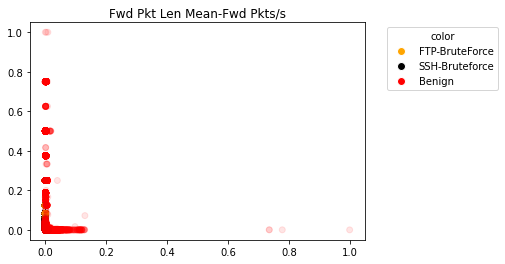

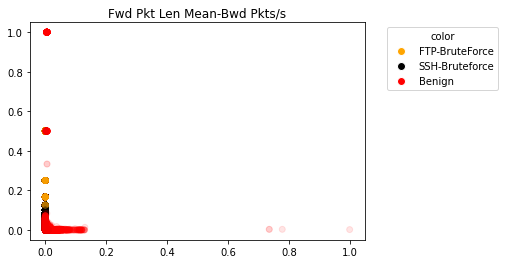

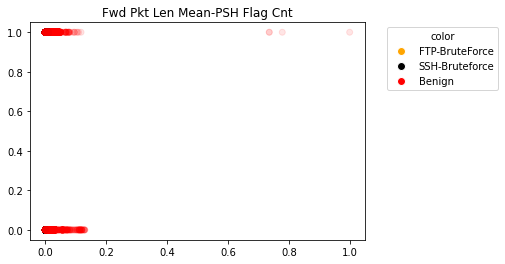

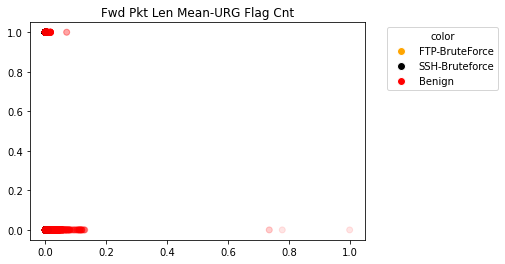

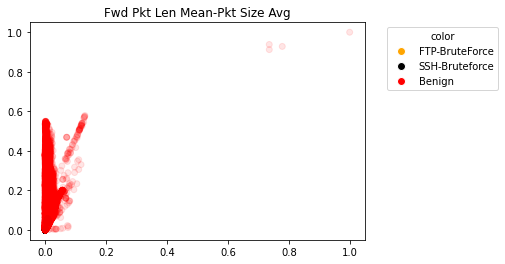

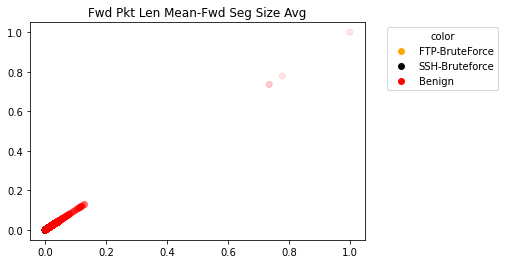

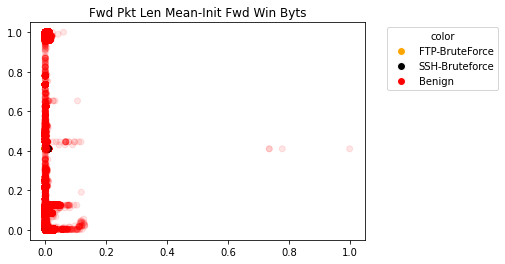

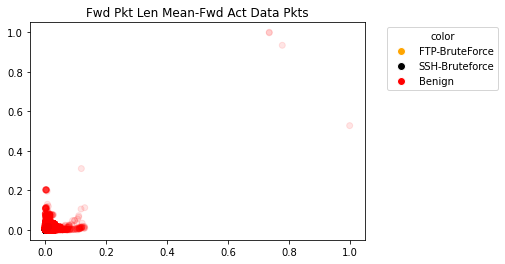

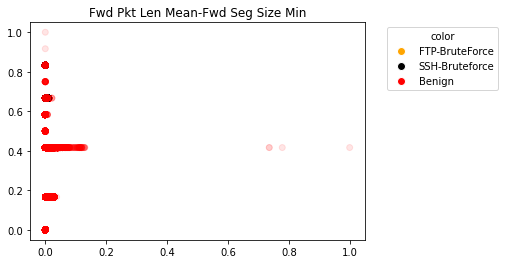

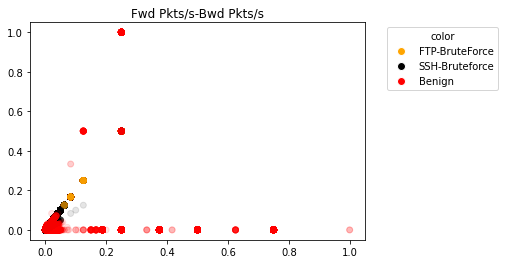

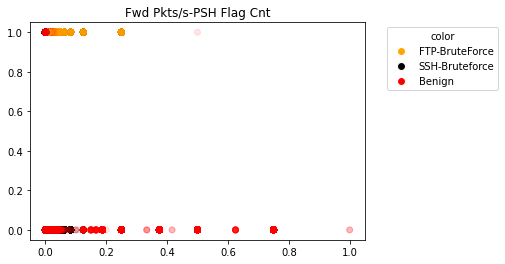

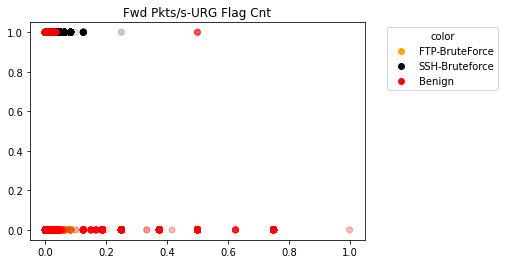

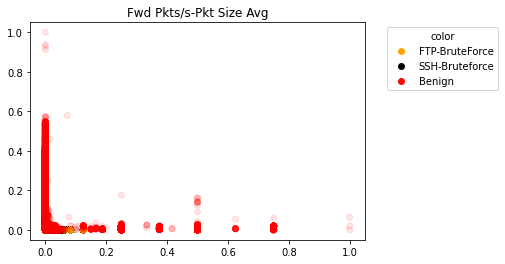

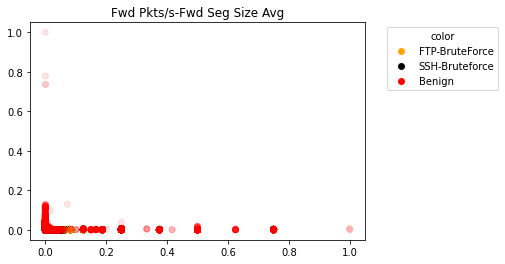

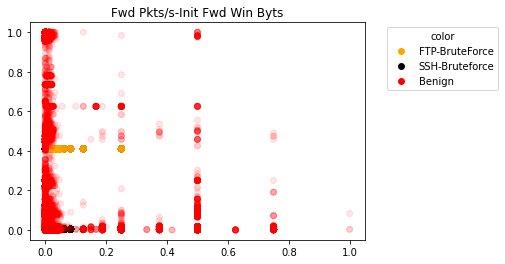

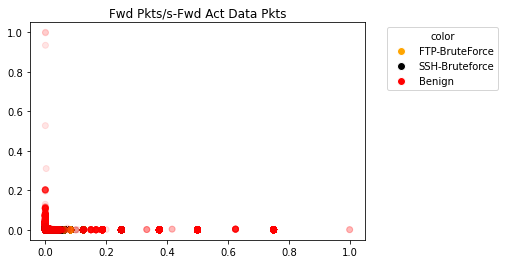

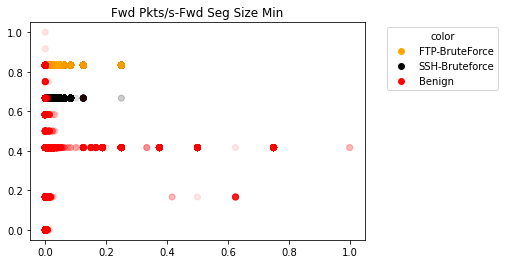

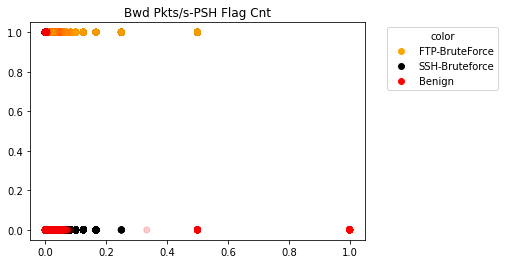

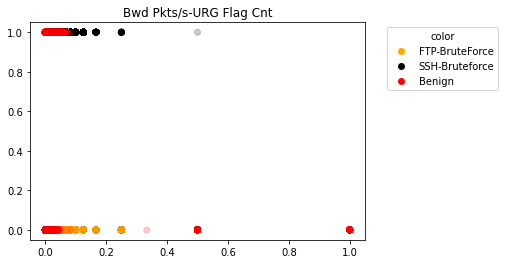

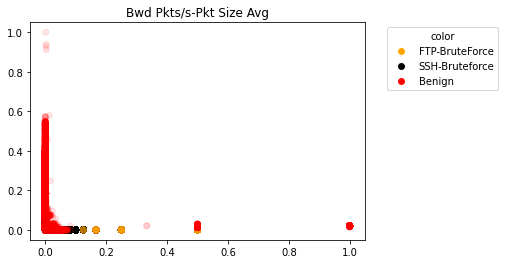

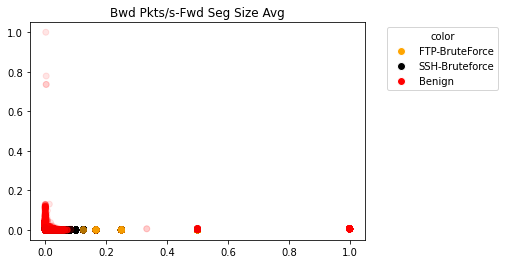

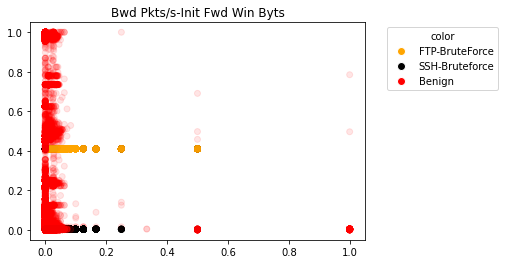

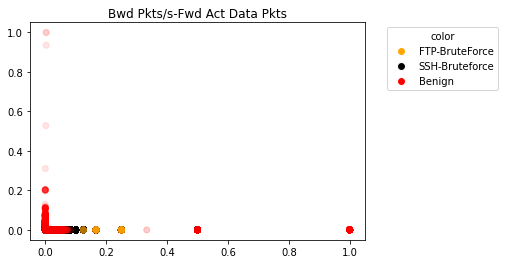

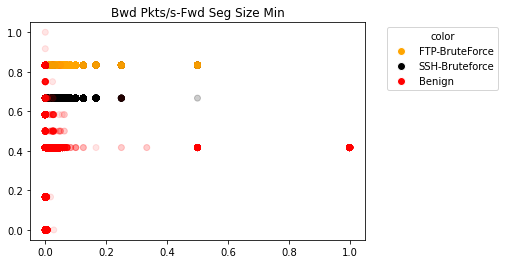

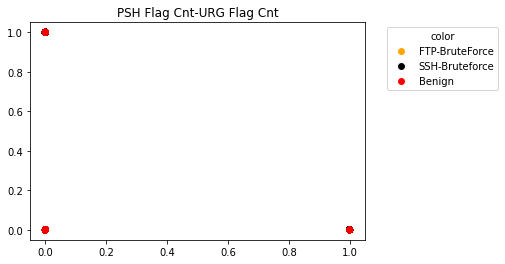

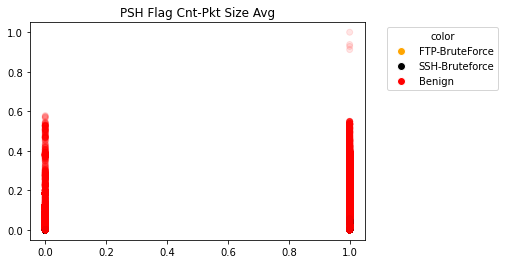

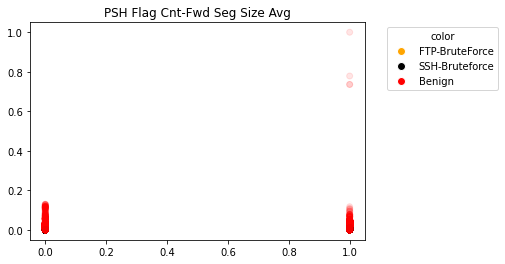

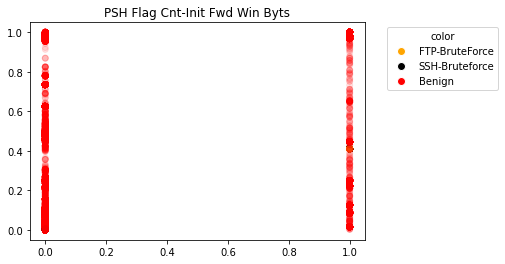

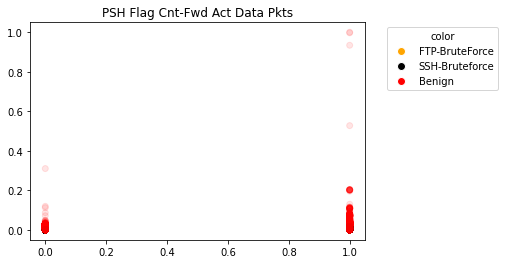

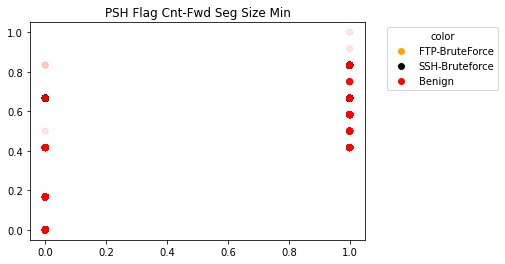

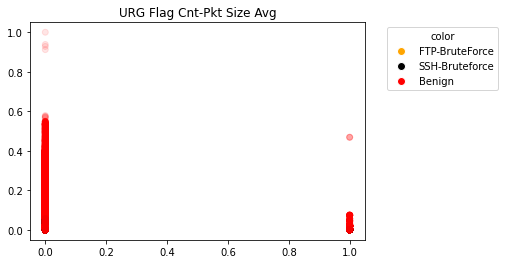

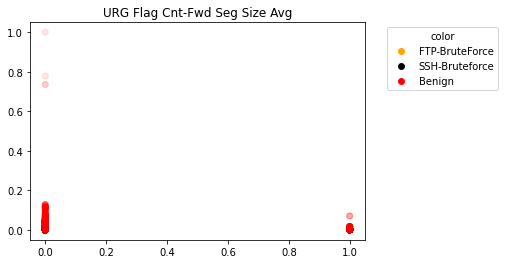

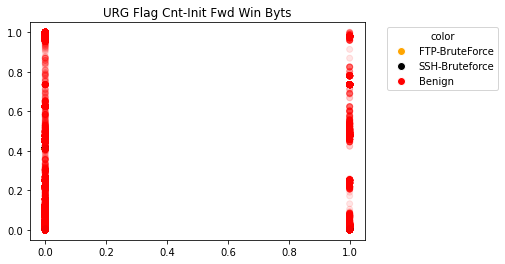

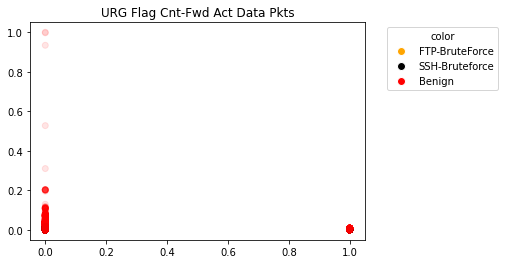

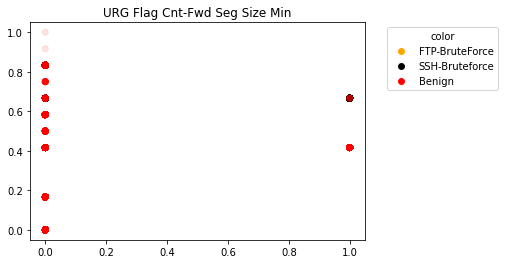

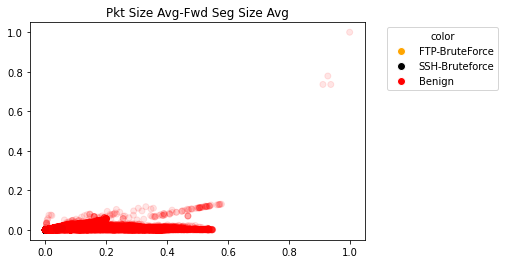

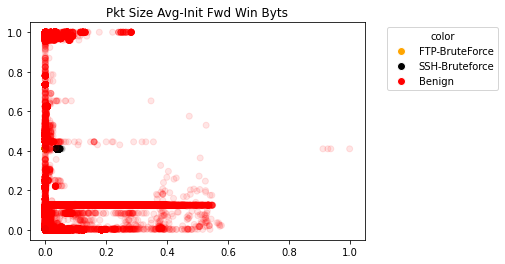

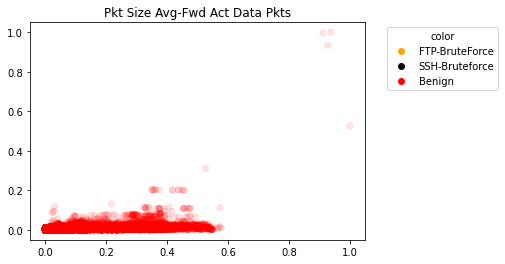

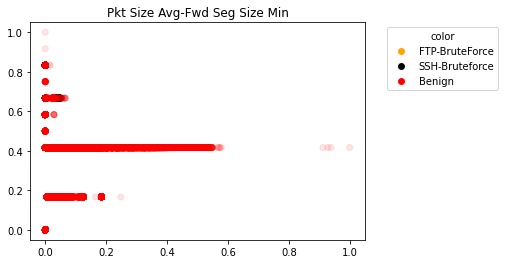

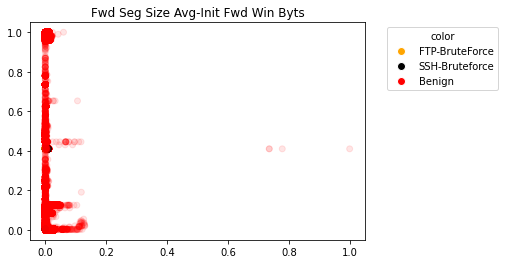

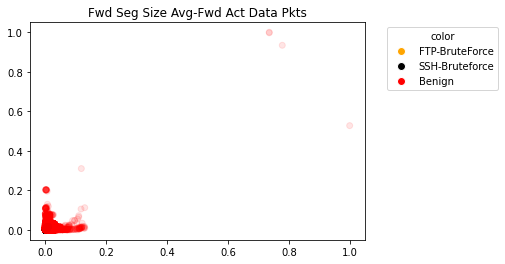

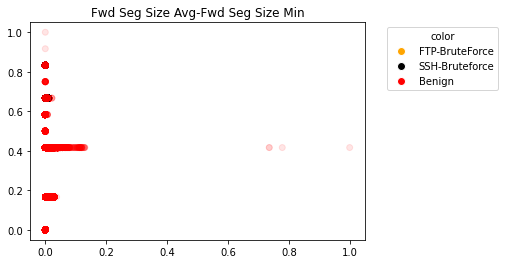

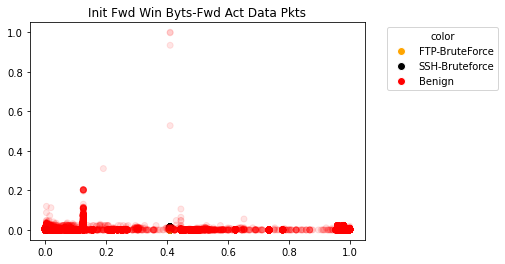

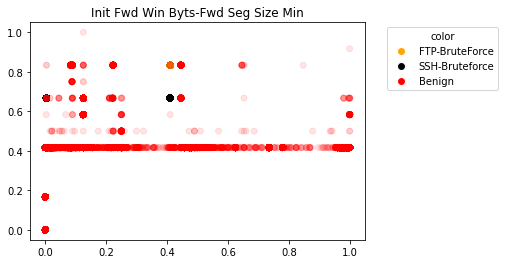

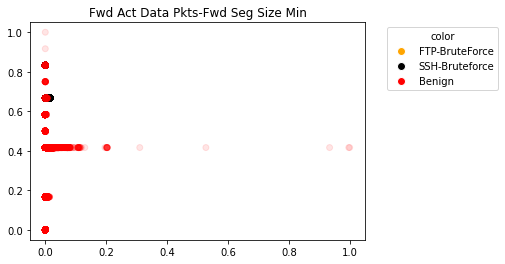

In [30]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

for a in comb:
    fig, ax = plt.subplots()
    ax.scatter(scaled_2[a[0]],scaled_2[a[1]],c=scaled_2['Label'].map(colors),alpha=.1)
    handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in colors.items()]
    plt.legend(title='color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(str(a[0])+'-'+str(a[1]))